# Programming and Scripting Project - Iris Dataset Analysis

This notebook was created using the Python 3.9.7 kernel (Anaconda distribution).

I imported the dataset using the scikit-learn module. Setting the as_frame option to True imported the dataset as a pandas dataframe.

In [2]:
from sklearn.datasets import load_iris              #loads the modules necessary for this code
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats

data = load_iris(as_frame=True)                     #loads the iris dataset as a Dataframe

irisData = data.frame                               #assigns the variable name irisData to the Dataframe

Summary statistics

In [3]:
print(irisData.head())                          #shows the first 5 lines of the dataframe to illustrate the structure

print("There are {} samples in the dataset".format(irisData['target'].count()))     #counts the samples in the dataset by counting each entry in the target column

print(irisData.describe())                      #describes the dataset as a whole. It gives summary statistics for each attribute without considering the separate varieties.


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
There are 150 samples in the dataset
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000  

More summary statistics - looking at the varieties separately

In [4]:
print("Target codes:\n0 =", data.target_names[0], "\n1 =", data.target_names[1], "\n2 =", data.target_names[2])

print(irisData.groupby('target').agg(
    {
        'sepal length (cm)': ["min", "max", "mean"],
        'sepal width (cm)': ["min", "max", "mean"],
        'petal length (cm)': ["min", "max", "mean"],
        'petal width (cm)': ["min", "max", "mean"]
    }

)
)


Target codes:
0 = setosa 
1 = versicolor 
2 = virginica
       sepal length (cm)             sepal width (cm)              \
                     min  max   mean              min  max   mean   
target                                                              
0                    4.3  5.8  5.006              2.3  4.4  3.428   
1                    4.9  7.0  5.936              2.0  3.4  2.770   
2                    4.9  7.9  6.588              2.2  3.8  2.974   

       petal length (cm)             petal width (cm)              
                     min  max   mean              min  max   mean  
target                                                             
0                    1.0  1.9  1.462              0.1  0.6  0.246  
1                    3.0  5.1  4.260              1.0  1.8  1.326  
2                    4.5  6.9  5.552              1.4  2.5  2.026  


Boxplots showing the distribution of the feature classes among each variety

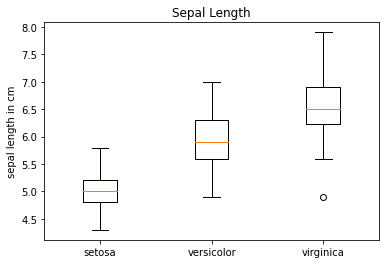

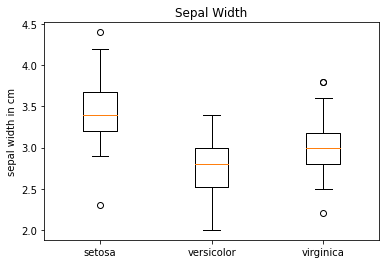

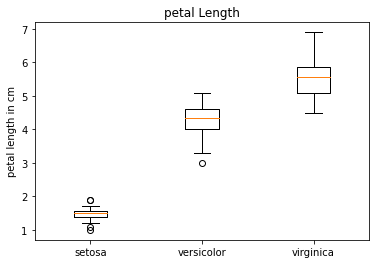

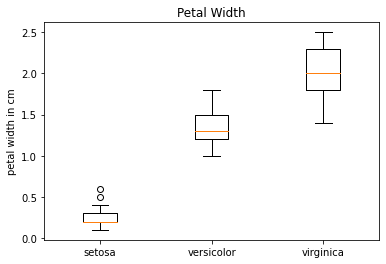

In [5]:
labels = data.target_names                  #creates a list of the variety names
sepLen = [                                #creates a list containing the sepal lengths of each variety
    irisData.iloc[:50]['sepal length (cm)'],irisData.iloc[50:100]['sepal length (cm)'],
    irisData.iloc[100:150]['sepal length (cm)']
]

sepWid = [                                #creates a list containing the sepal widths of each variety
    irisData.iloc[:50]['sepal width (cm)'],irisData.iloc[50:100]['sepal width (cm)'],
    irisData.iloc[100:150]['sepal width (cm)']
]

petLen = [                                #creates a list containing the petal lengths of each variety
    irisData.iloc[:50]['petal length (cm)'],irisData.iloc[50:100]['petal length (cm)'],
    irisData.iloc[100:150]['petal length (cm)']
]

petWid = [                                #creates a list containing the petal widths of each variety
    irisData.iloc[:50]['petal width (cm)'],irisData.iloc[50:100]['petal width (cm)'],
    irisData.iloc[100:150]['petal width (cm)']
]

plt.boxplot(sepLen, labels = labels)      
plt.ylabel("sepal length in cm")
plt.title("Sepal Length")
plt.show()

plt.boxplot(sepWid, labels = labels)      
plt.ylabel("sepal width in cm")
plt.title("Sepal Width")
plt.show()

plt.boxplot(petLen, labels = labels)      
plt.ylabel("petal length in cm")
plt.title("petal Length")
plt.show()

plt.boxplot(petWid, labels = labels)      
plt.ylabel("petal width in cm")
plt.title("Petal Width")
plt.show()

Six Sigma

In [6]:
print(irisData.groupby('target').agg(   #finds the standard deviation of the four attributes for each variety of iris
    {
        'sepal length (cm)': ["std"],
        'sepal width (cm)': ["std"],
        'petal length (cm)': ["std"],
        'petal width (cm)': ["std"]
    }
)
)

       sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
                     std              std               std              std
target                                                                      
0               0.352490         0.379064          0.173664         0.105386
1               0.516171         0.313798          0.469911         0.197753
2               0.635880         0.322497          0.551895         0.274650


Create an algorithm to classify iris samples